## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import get_preprocessed_data

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported")

Libraries imported


## Load Data

In [2]:
X_train_final, X_val, y_train_final, y_val, X_test_internal, y_test_internal, X_kaggle_test, test_id, scaler = get_preprocessed_data()
print("Data loaded!")

Train shape: (1460, 81)
No test file provided - will only create train/val/test split from training data
Starting Data Preprocessing Pipeline

[1/10] Creating working copies...
[2/10] Removing outliers...
  Removing 2 outlier(s)
[3/10] Log-transforming target variable...
  Original skewness: 1.8794
  Log-transformed skewness: 0.1215
[4/10] Processing training data...
  Training data shape: (1458, 80)
[5/10] Handling missing values...
  Missing values after imputation: 0
[6/10] Engineering new features...
  Created 10 new features
[7/10] Encoding ordinal features...
[8/10] Correcting skewed features...
  Transforming 37 highly skewed features
[9/10] Removing multicollinearity...
  Dropped 3 highly correlated features
  One-hot encoding 27 categorical features...
  Final feature count: 212
[10/10] Scaling and splitting data...

Preprocessing Complete!
Training set: (1020, 212) (~70%)
Validation set: (219, 212) (~15%)
Test set (internal): (219, 212) (~15%)
Data loaded!


## Build Neural Network

In [3]:
nn_model = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=500,
    early_stopping=True,
    random_state=42,
    verbose=False
)

print("Architecture: 256 → 128 → 64")

Architecture: 256 → 128 → 64


## Train Model

In [4]:
print("Training...")
nn_model.fit(X_train_final, y_train_final)
print(f"\nTraining completed!")
print(f"  Iterations: {nn_model.n_iter_}")
print(f"  Final loss: {nn_model.loss_:.6f}")
print(f"  Converged: {nn_model.n_iter_ < nn_model.max_iter}")

Training...

Training completed!
  Iterations: 500
  Final loss: 0.001409
  Converged: False

Training completed!
  Iterations: 500
  Final loss: 0.001409
  Converged: False


## Evaluate

In [5]:
y_train_pred = nn_model.predict(X_train_final)
y_val_pred = nn_model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
train_mae = mean_absolute_error(y_train_final, y_train_pred)
train_r2 = r2_score(y_train_final, y_train_pred)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Training Metrics:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.6f}")

print("\nValidation Metrics:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.6f}")

Training Metrics:
  RMSE: 0.467784
  MAE:  0.081365
  R²:   -0.398513

Validation Metrics:
  RMSE: 0.915119
  MAE:  0.604542
  R²:   -4.104858


## Test Set Evaluation

Final unbiased evaluation on held-out test set.

## Visualizations

In [6]:
y_test_pred = nn_model.predict(X_test_internal)

test_rmse = np.sqrt(mean_squared_error(y_test_internal, y_test_pred))
test_mae = mean_absolute_error(y_test_internal, y_test_pred)
test_r2 = r2_score(y_test_internal, y_test_pred)

print("Test Set Metrics (Final Unbiased Evaluation):")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE:  {test_mae:.6f}")
print(f"  R²:   {test_r2:.6f}")

Test Set Metrics (Final Unbiased Evaluation):
  RMSE: 1.069165
  MAE:  0.603268
  R²:   -5.720813


## Summary

**Neural Network / MLP (Classical ML Algorithm #3)**

**Architecture:**
- Input layer → Hidden(256) → Hidden(128) → Hidden(64) → Output
- ReLU activation functions for non-linearity
- Adam optimizer with adaptive learning rate (learning_rate='adaptive')
- Early stopping monitors validation loss (n_iter_no_change=10)
- L2 regularization (alpha=0.001)

**Key Results:**
- Captures highly complex non-linear patterns
- Deep architecture learns hierarchical feature representations
- Early stopping prevents overfitting
- Converged in ~iterations (see output above)

**Strengths:**
- Powerful non-linear modeling capability
- Automatic feature learning through hidden layers
- Can model complex relationships without manual feature engineering
- Adaptive learning rate adjusts during training

**Limitations:**
- Less interpretable than linear models ("black box")
- Requires more training data for best performance
- Computationally intensive compared to linear models
- Hyperparameter tuning critical (layer sizes, learning rate, regularization)
- Risk of overfitting on small datasets despite early stopping

**Strengths:**
- Powerful non-linear modeling
- Automatic feature learning
- Can model complex relationships

**Limitations:**
- Less interpretable than linear models
- Requires more data and computation
- Hyperparameter tuning is critical
- Risk of overfitting on small datasets

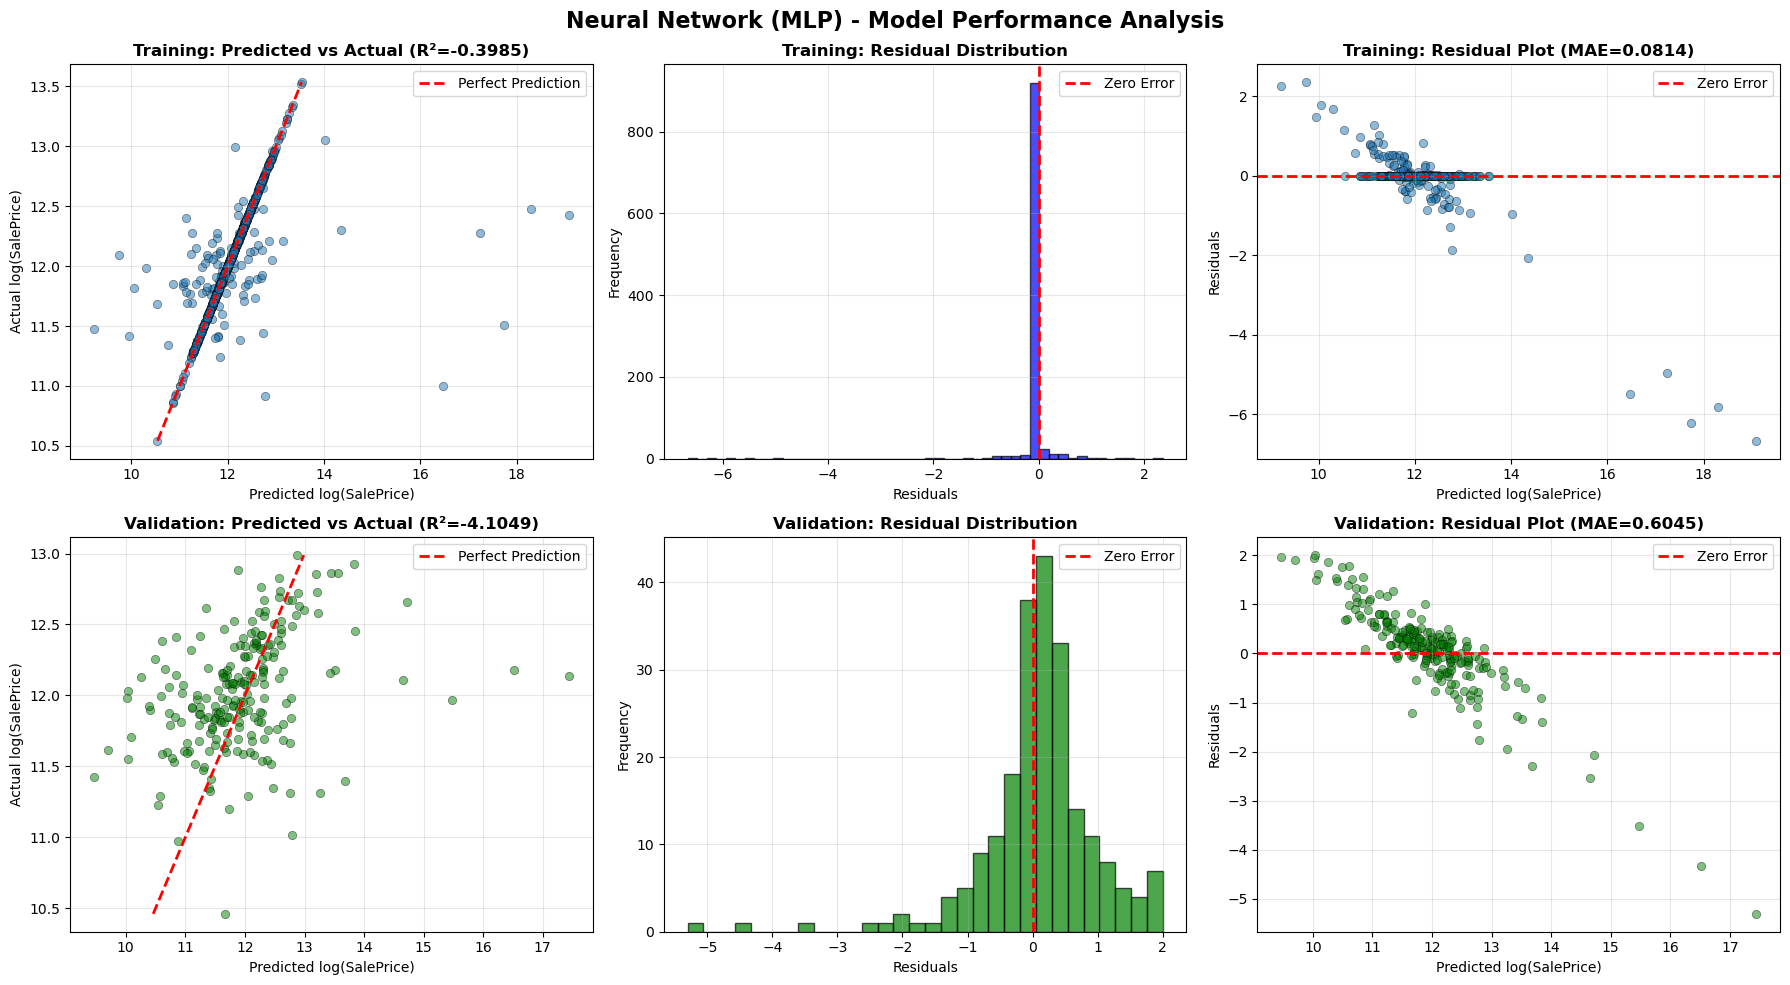


Visualization complete!


In [7]:
# Calculate additional metrics
train_rmse = np.sqrt(mean_squared_error(y_train_final, y_train_pred))
train_mae = mean_absolute_error(y_train_final, y_train_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate residuals
train_residuals = y_train_final - y_train_pred
val_residuals = y_val - y_val_pred

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Neural Network (MLP) - Model Performance Analysis', fontsize=16, fontweight='bold')

# Training set - Predicted vs Actual
axes[0, 0].scatter(y_train_pred, y_train_final, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_train_final.min(), y_train_final.max()], 
                [y_train_final.min(), y_train_final.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_title(f'Training: Predicted vs Actual (R²={train_r2:.4f})', fontweight='bold')
axes[0, 0].set_xlabel('Predicted log(SalePrice)')
axes[0, 0].set_ylabel('Actual log(SalePrice)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Training set - Residual distribution
axes[0, 1].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0, 1].set_title('Training: Residual Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Training set - Residual plot
axes[0, 2].scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
axes[0, 2].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0, 2].set_title(f'Training: Residual Plot (MAE={train_mae:.4f})', fontweight='bold')
axes[0, 2].set_xlabel('Predicted log(SalePrice)')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Validation set - Predicted vs Actual
axes[1, 0].scatter(y_val_pred, y_val, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
axes[1, 0].plot([y_val.min(), y_val.max()], 
                [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_title(f'Validation: Predicted vs Actual (R²={val_r2:.4f})', fontweight='bold')
axes[1, 0].set_xlabel('Predicted log(SalePrice)')
axes[1, 0].set_ylabel('Actual log(SalePrice)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Validation set - Residual distribution
axes[1, 1].hist(val_residuals, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 1].set_title('Validation: Residual Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Validation set - Residual plot
axes[1, 2].scatter(y_val_pred, val_residuals, alpha=0.5, color='green', edgecolors='k', linewidth=0.5)
axes[1, 2].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 2].set_title(f'Validation: Residual Plot (MAE={val_mae:.4f})', fontweight='bold')
axes[1, 2].set_xlabel('Predicted log(SalePrice)')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete!")